In [1]:
import sys
sys.path.append('/home/dnxx/RMNIM/')
from ip import *

In [2]:
import cv2
import numpy as np
from ac2D import *
import matplotlib.pyplot as plt
from snake import Snake2D, Snake3D, SnakeParams
from skimage.util import img_as_ubyte

In [3]:
OP1 = load_tif_stack("./OPF/")

In [4]:
# simple_imshow(projection2d(img_as_ubyte(OP1), "max"))

In [5]:
# slide_imshow(img_as_ubyte(OP1))

In [6]:
OP1_cropped = OP1[:,:,:]

In [7]:
# simple_imshow([projection2d(img_as_ubyte(OP1_cropped), "max")])

In [8]:
OP1_proj2d = projection2d(img_as_ubyte(OP1_cropped), "max")

In [35]:
# Parâmetros da elipse
center = (OP1_proj2d.shape[1] // 2 - 220, OP1_proj2d.shape[0] // 2 + 155)  # Centro em (x, y)
semi_major = 32  # Semi-eixo maior
semi_minor = 17  # Semi-eixo menor
angle = 90*np.pi/180  # Rotação de 45 graus
num_points = 70  # Número de pontos

# Gerar contorno elíptico
OP1_V_elipse = init_elipse(center, semi_major, semi_minor, angle, num_points)

# metal1_V_circle = init_circle(
#     (metal1.shape[1] // 2 - 3, metal1.shape[0] // 2 - 50), 370, num_points=50
# )
subdivision_k = 3
OP1_V_subdivided = subdivision(OP1_V_elipse, k=subdivision_k)
print("Pontos subdivididos:", OP1_V_subdivided.shape)
OP1_v_init = OP1_V_subdivided

Pontos subdivididos: (70, 2)


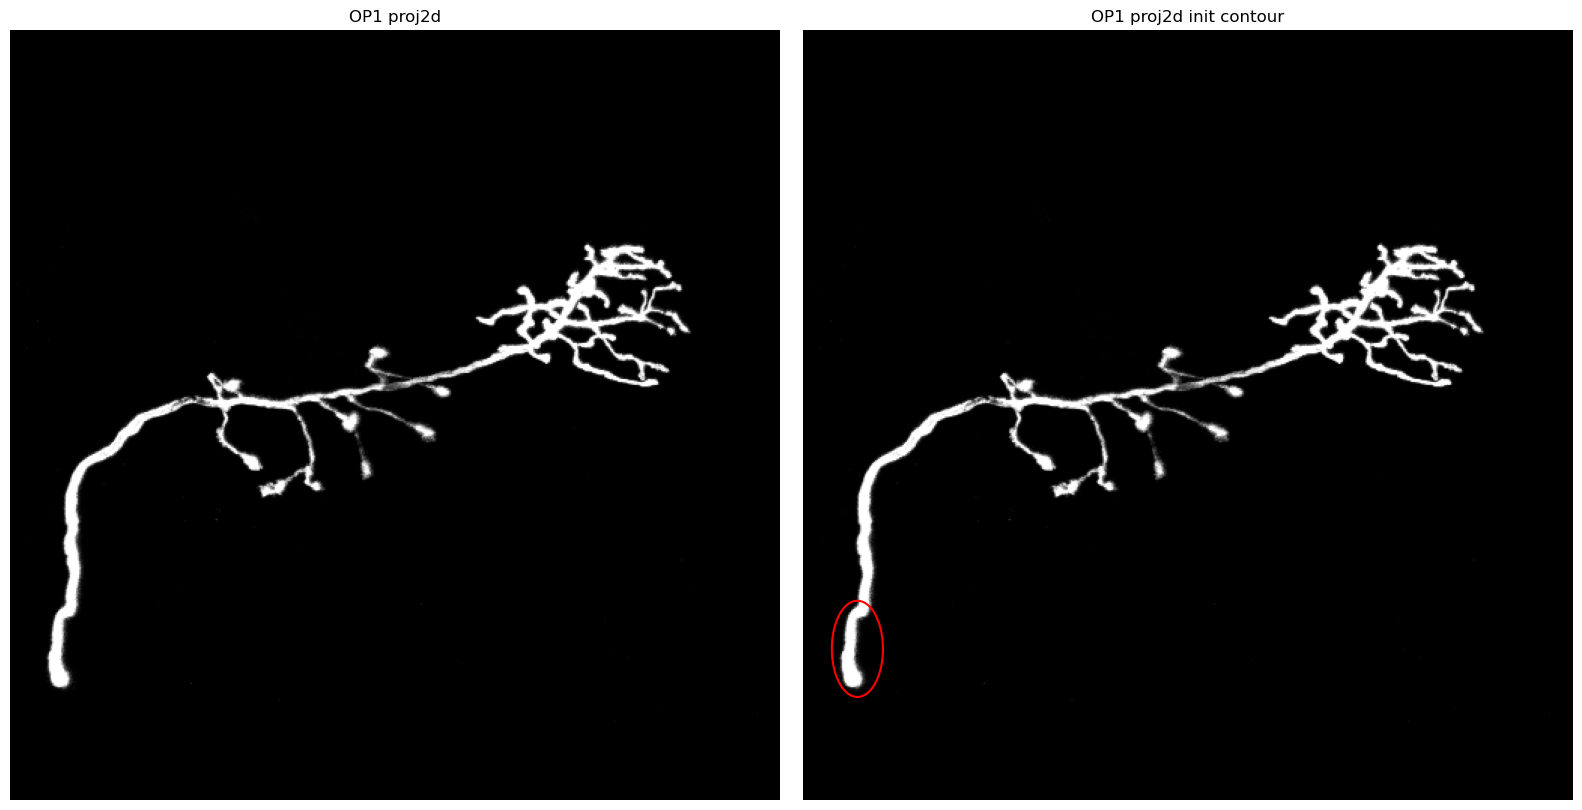

In [36]:
# Display initial contour
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
ax1.imshow(OP1_proj2d, cmap="gray")
ax1.set_title("OP1 proj2d")
ax1.axis("off")
ax2.imshow(OP1_proj2d, cmap="gray")
ax2.set_title("OP1 proj2d init contour")
ax2.plot(OP1_v_init[:, 0], OP1_v_init[:, 1], "r-")
ax2.axis("off")
plt.tight_layout()
plt.show()

In [37]:
# Configure snake parameters
OP1_params = SnakeParams(
    alpha=400.0,  # Stronger continuity
    beta=400.0,  # Stronger curvature
    k=float(subdivision_k),
    gamma=0.0025,  # Smaller time step
    sigma=2.0,  # Less blur
    kb=0.0,  # Weaker balloon force
    sb=0.0,  # More smoothing
    max_iter=1000,
    verbose=True,
    cubic_spline_refinement=True,
    dmax=1.5,
    mfactor=1.03,
    vfc_ksize=5,
    vfc_sigma=2.0,
    L2_gradient=False
)

# Create and evolve snake
OP1_snake = Snake3D(OP1_cropped, OP1_v_init, OP1_params)
v_final = OP1_snake.evolve_coupled()


Iteration 0, error: 0.071928
Iteration 50, error: 0.054392
Iteration 100, error: 0.105070
Iteration 150, error: 0.092524
Iteration 200, error: 0.108159
Iteration 250, error: 0.104414
Iteration 300, error: 0.116728
Iteration 350, error: 0.108461
Iteration 400, error: 0.117035
Iteration 450, error: 0.109879
Iteration 500, error: 0.118108
Iteration 550, error: 0.112972
Iteration 600, error: 0.115113
Iteration 650, error: 0.116766
Iteration 700, error: 0.121033
Iteration 750, error: 0.118382
Iteration 800, error: 0.112545
Iteration 850, error: 0.108214
Iteration 900, error: 0.109104
Iteration 950, error: 0.100379
Maximum iterations (1000) reached. Time: 26.95s


In [38]:
len(v_final[0])

90

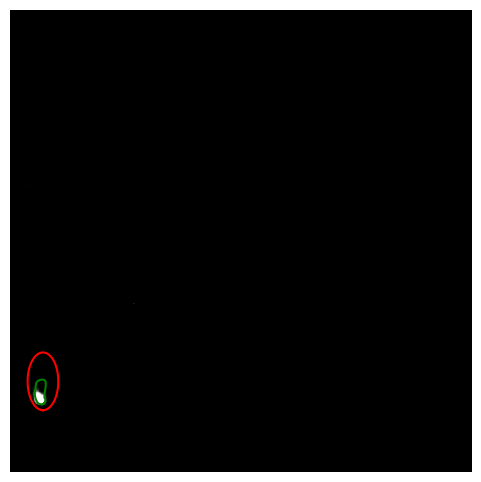

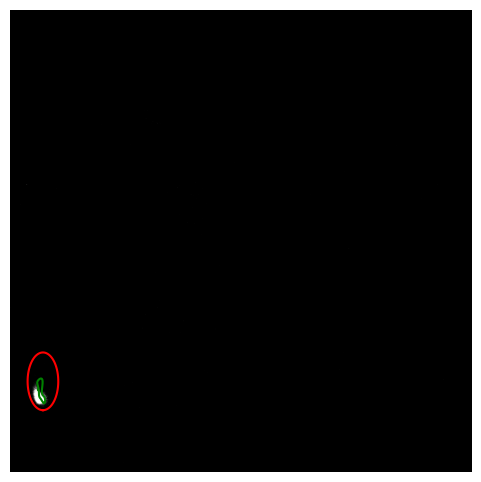

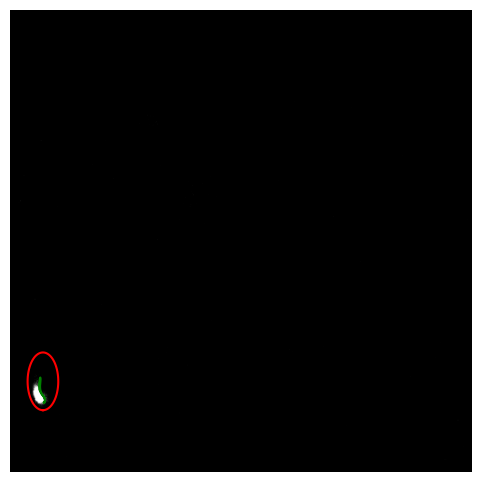

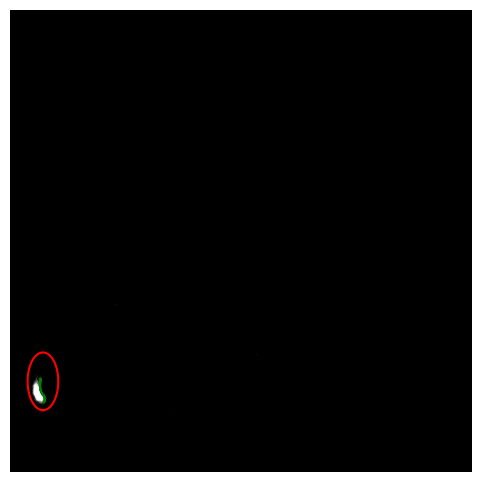

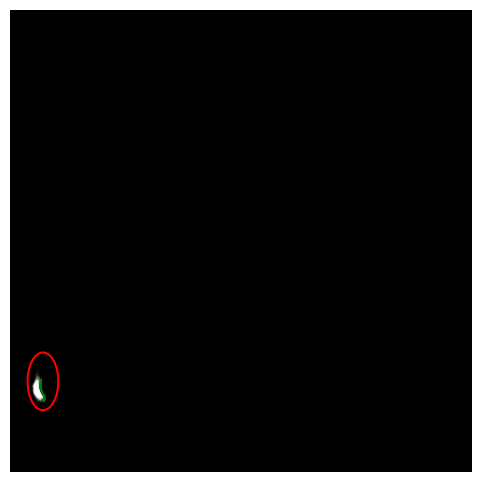

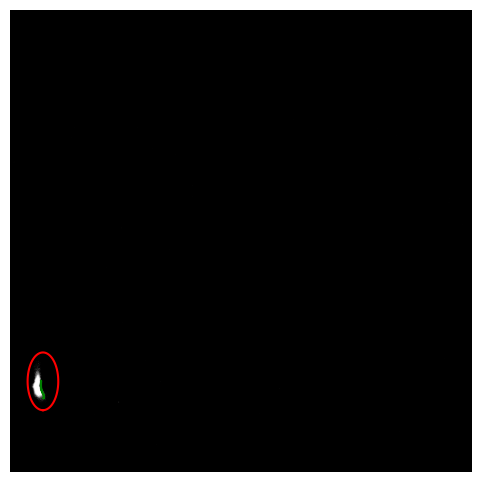

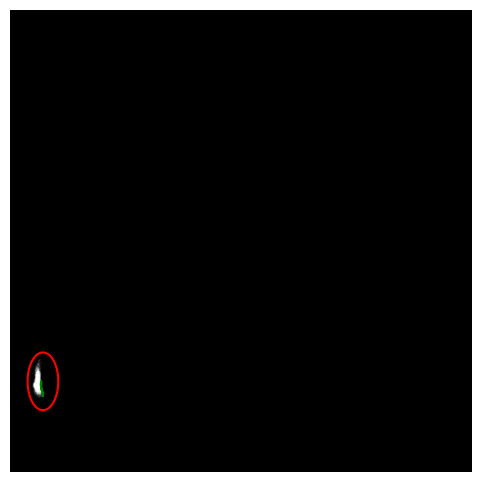

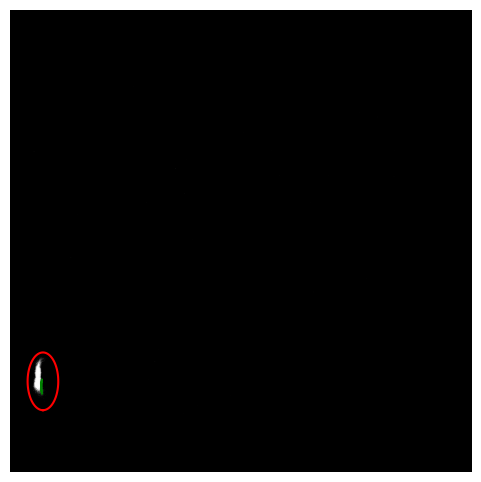

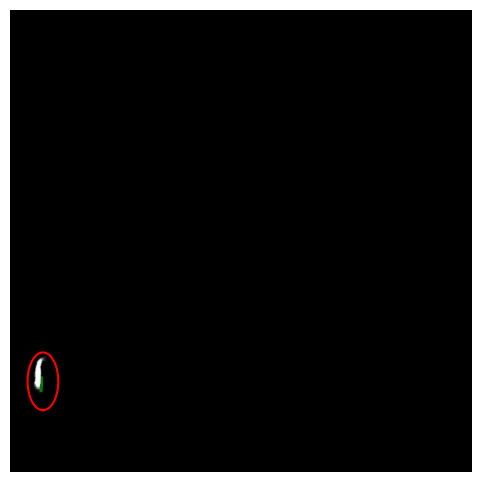

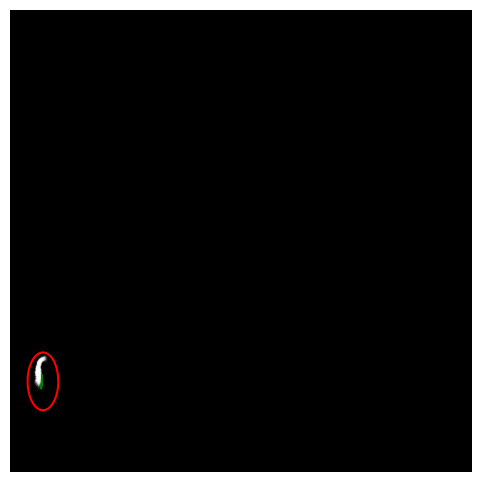

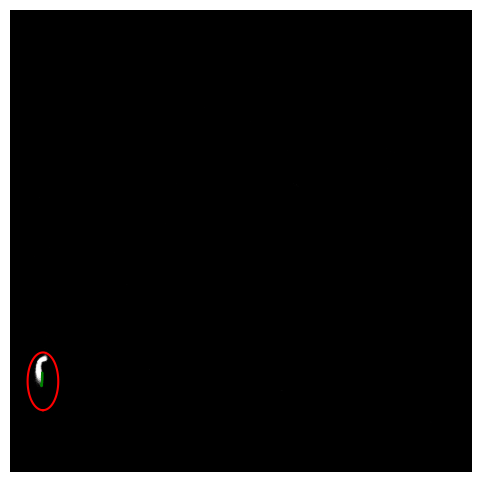

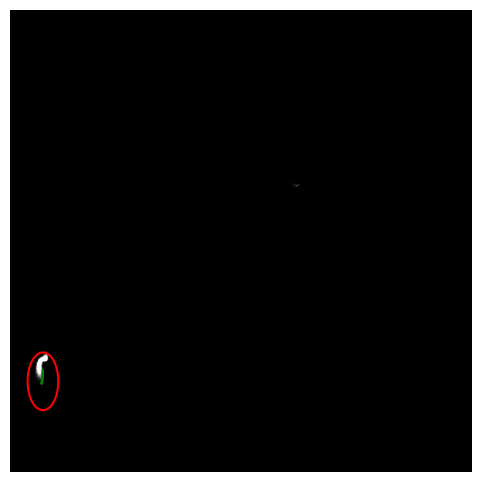

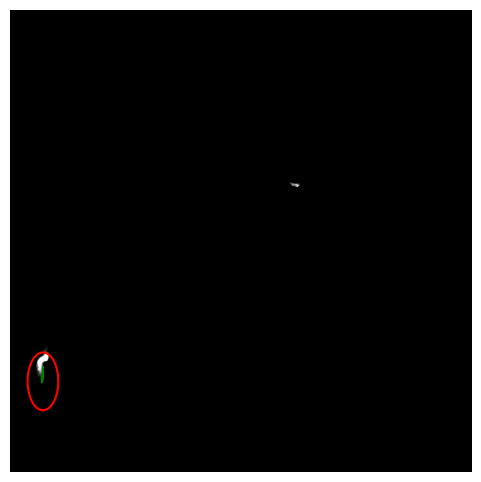

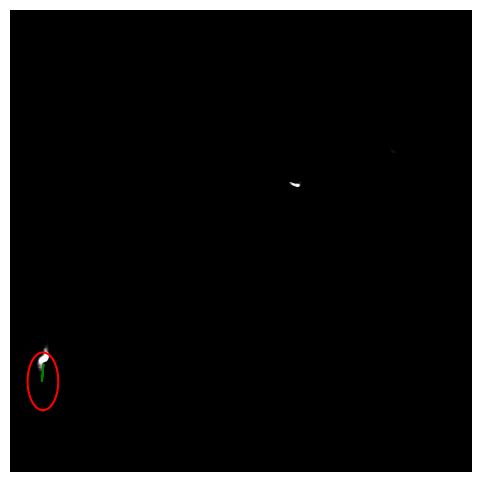

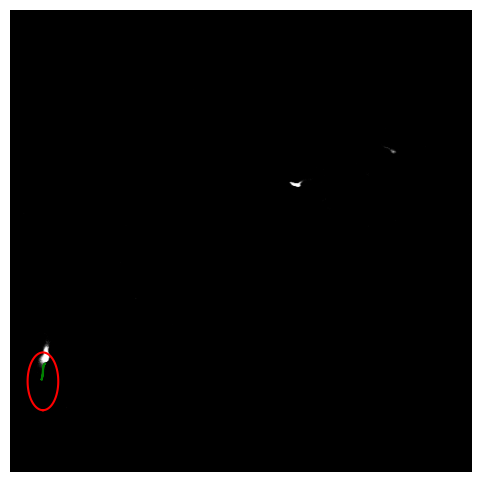

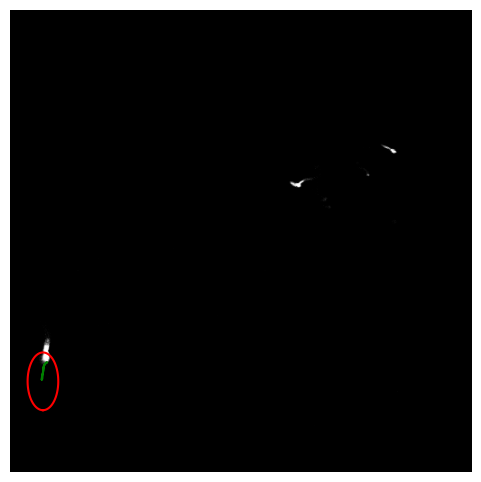

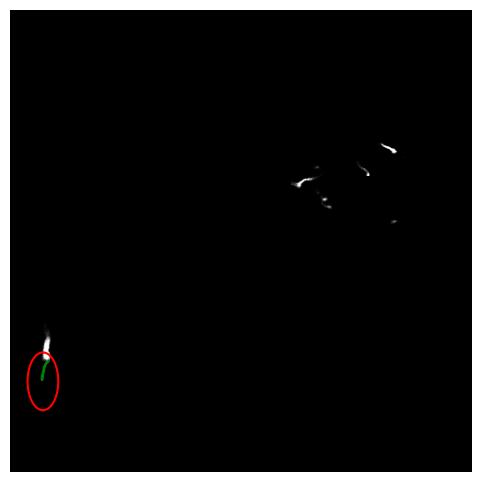

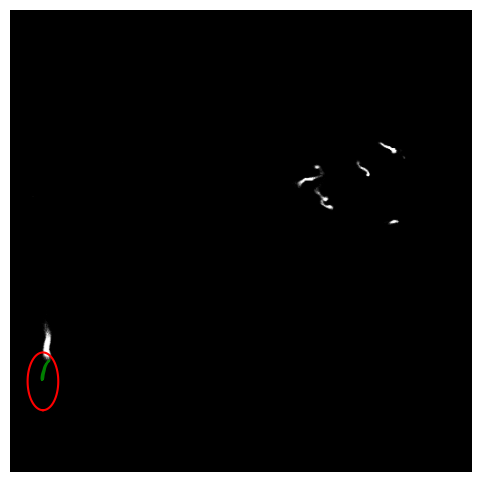

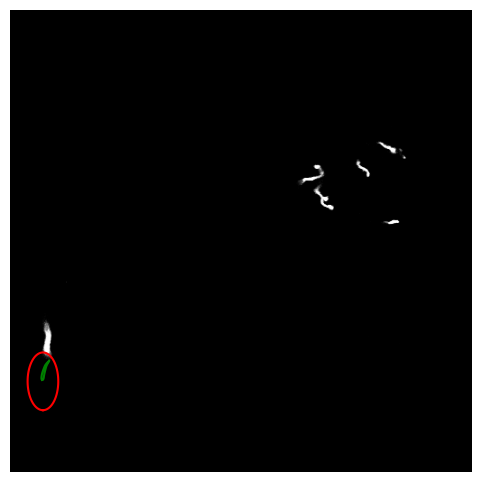

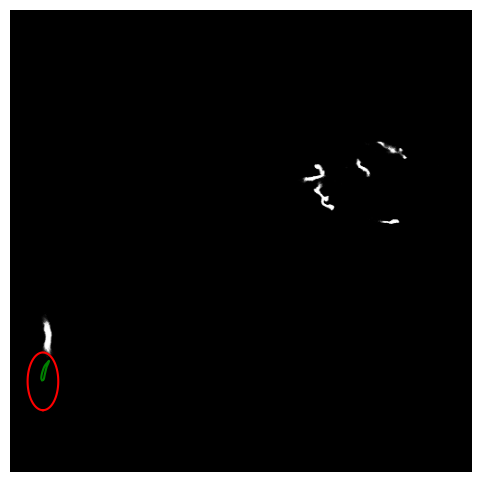

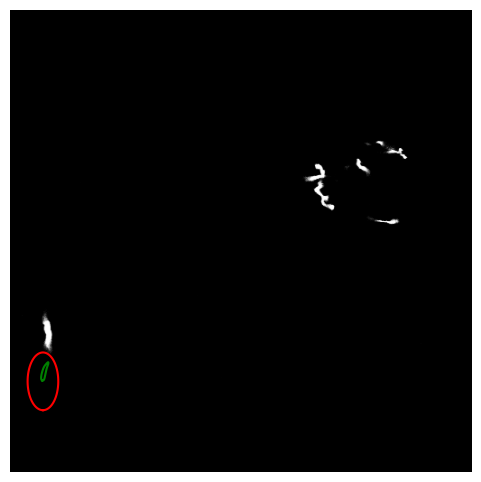

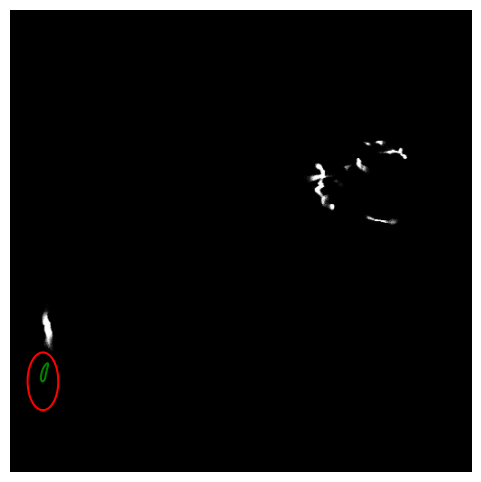

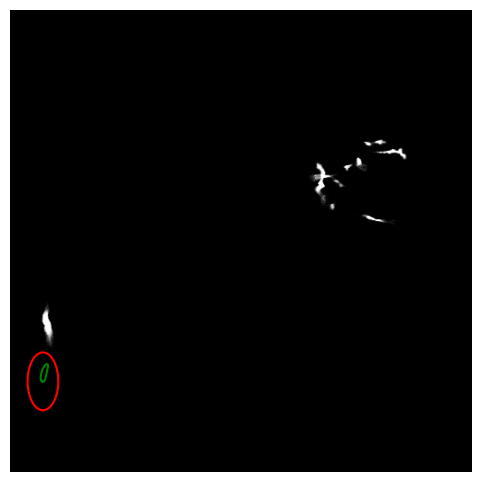

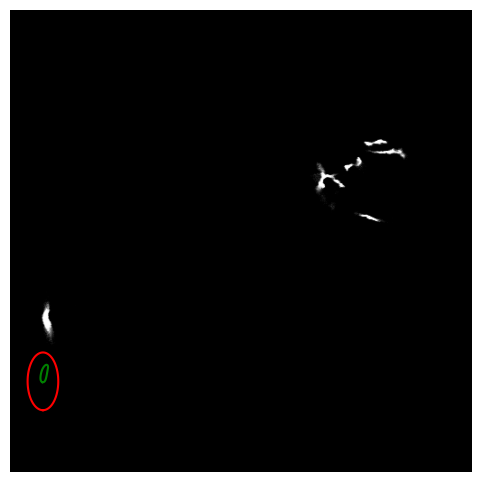

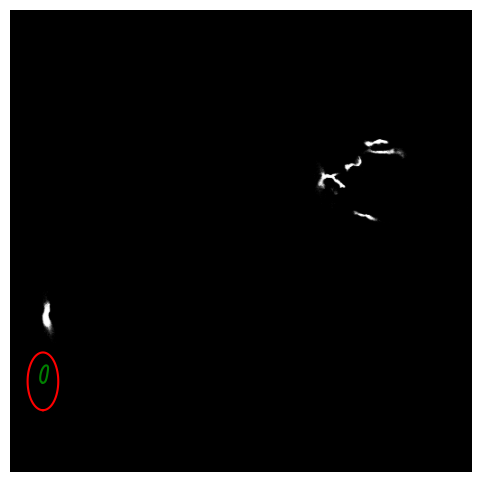

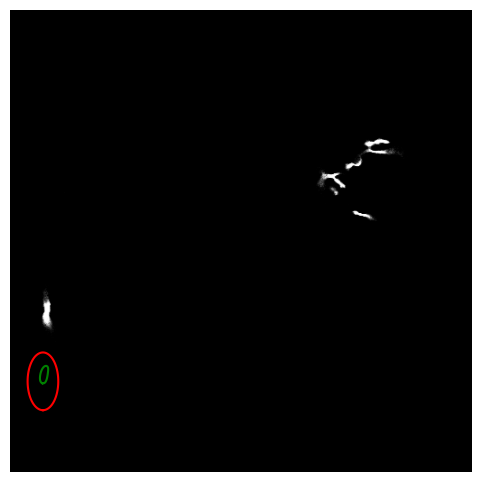

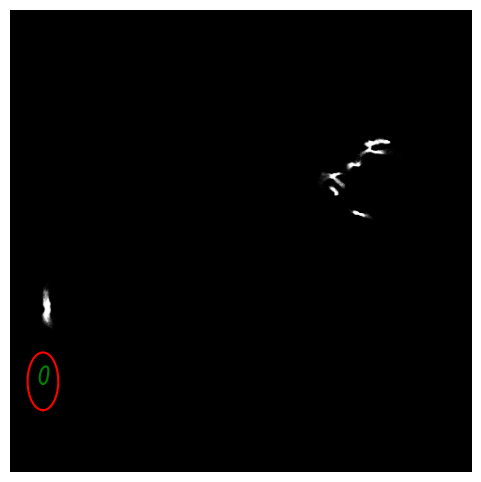

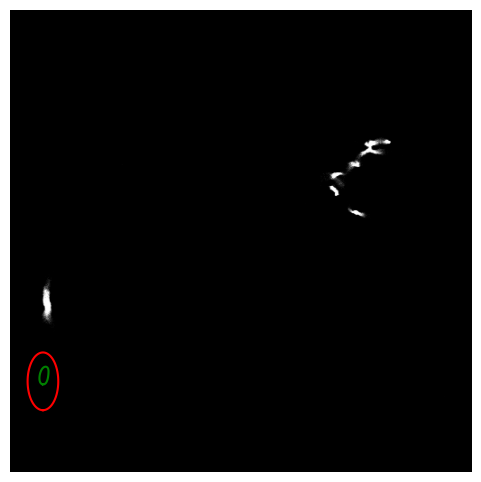

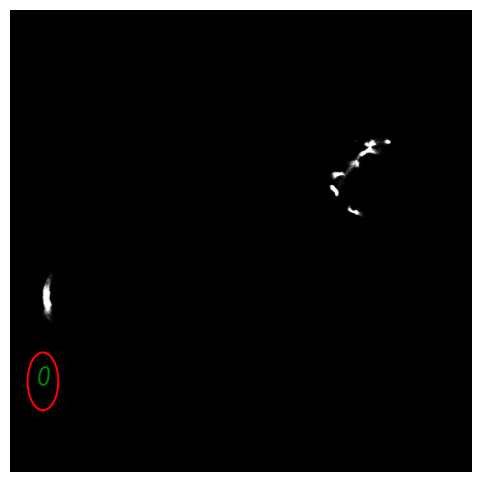

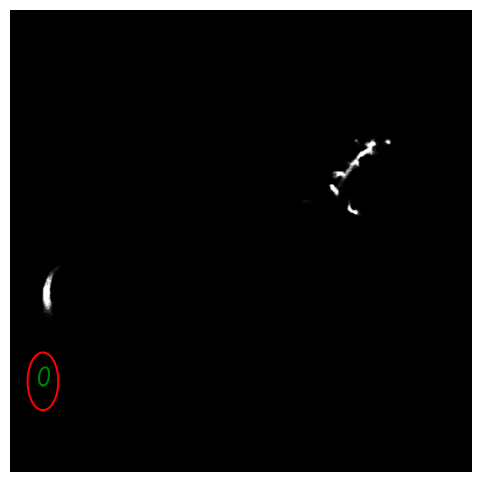

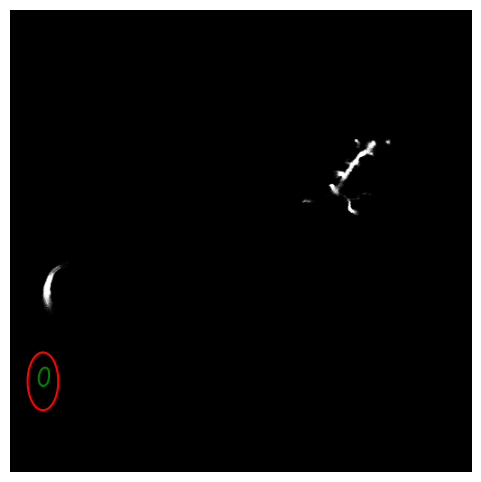

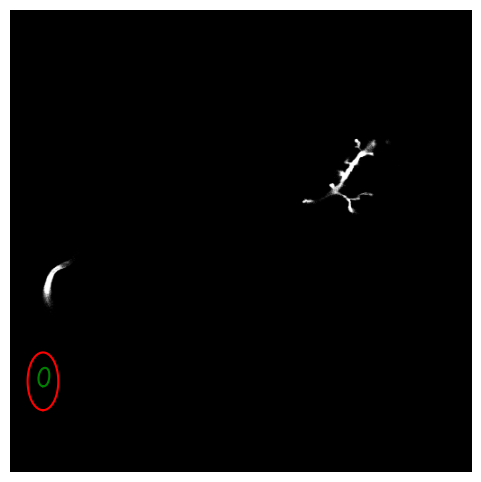

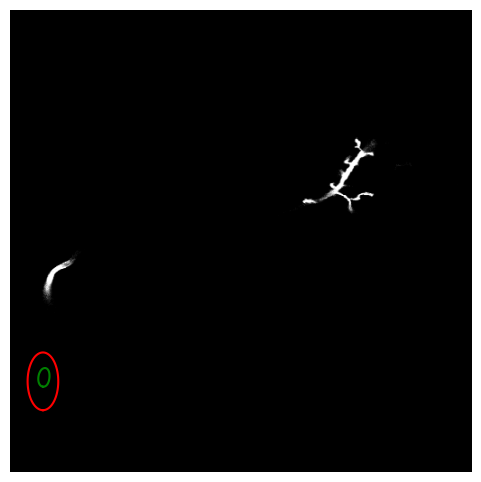

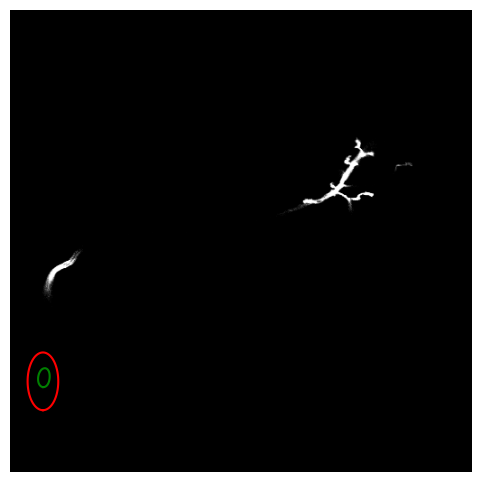

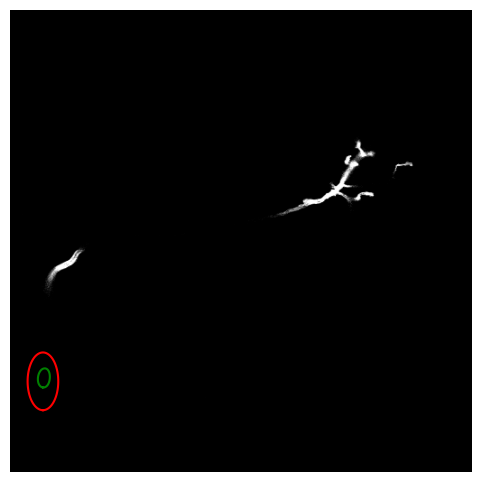

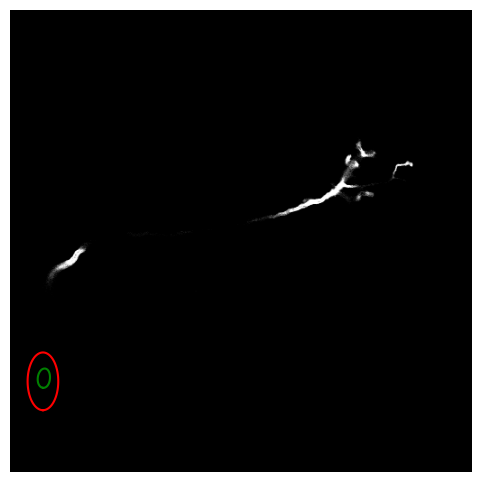

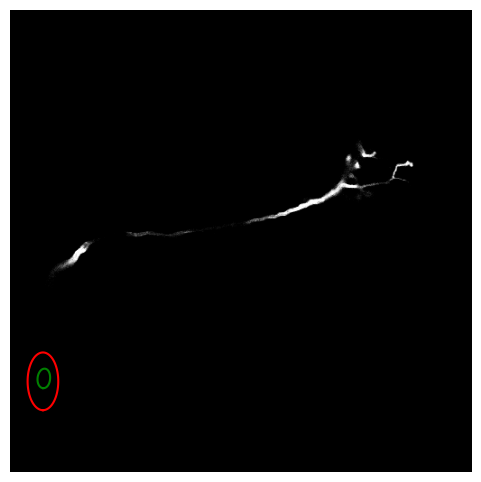

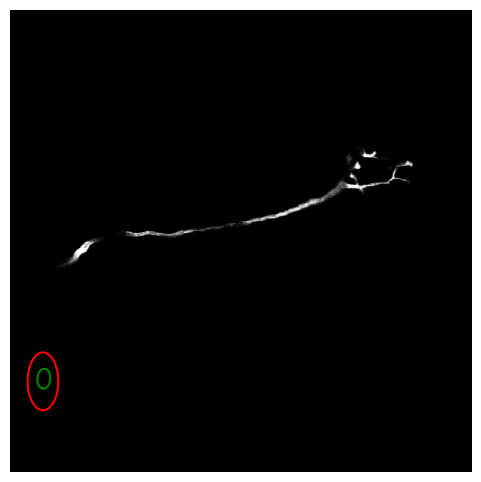

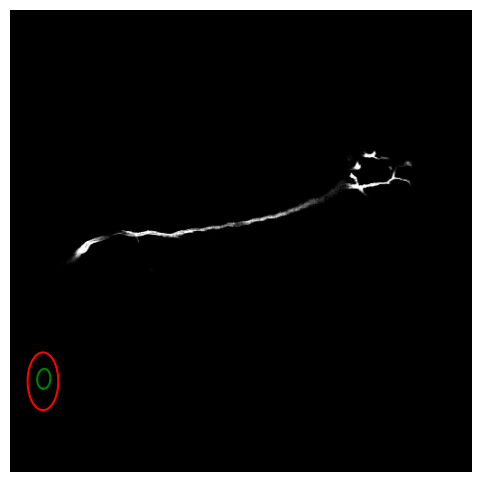

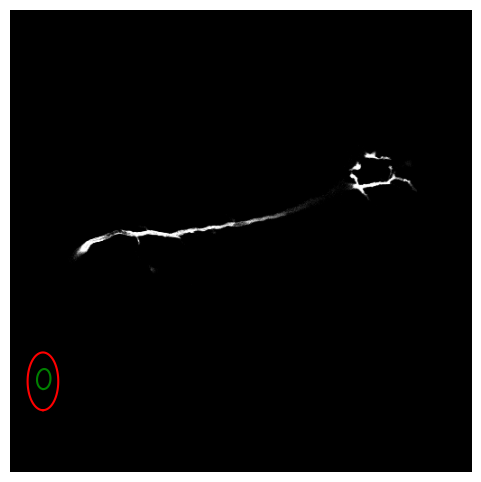

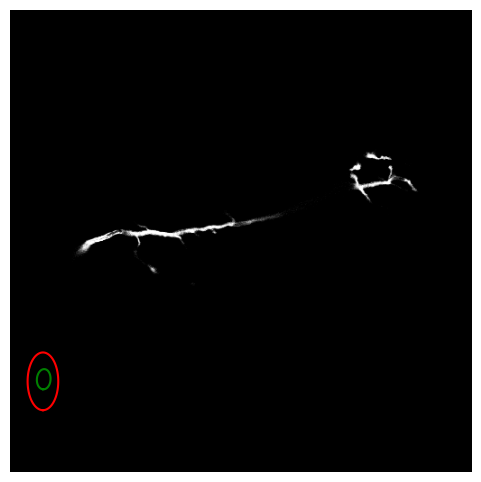

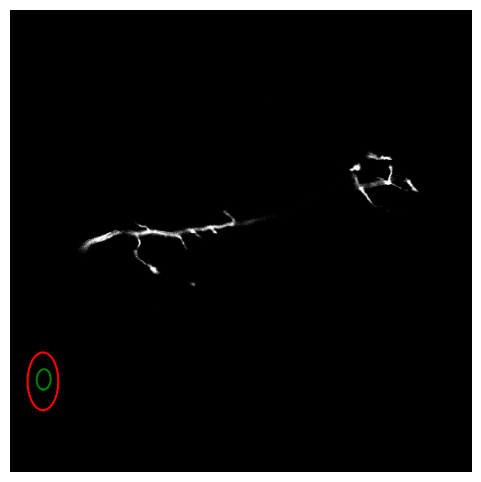

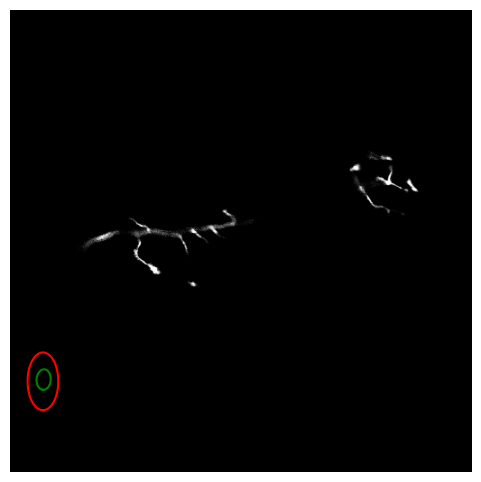

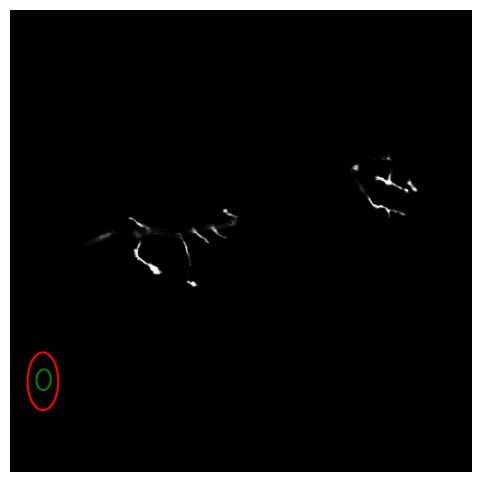

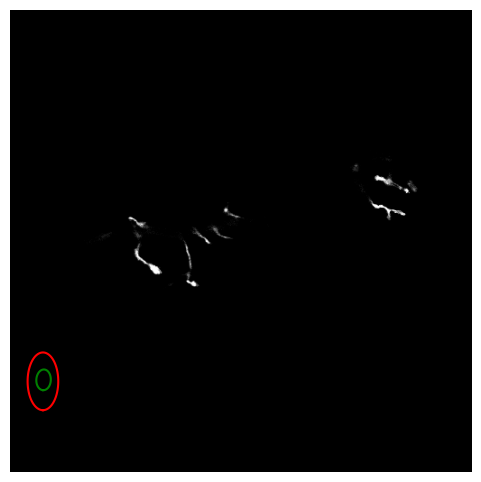

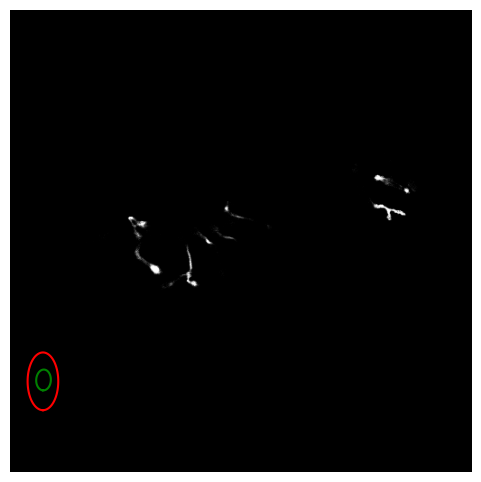

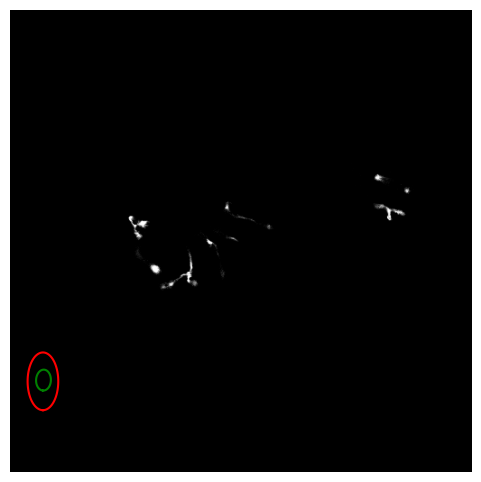

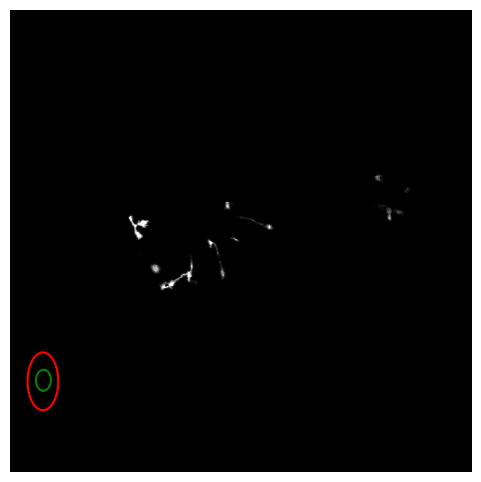

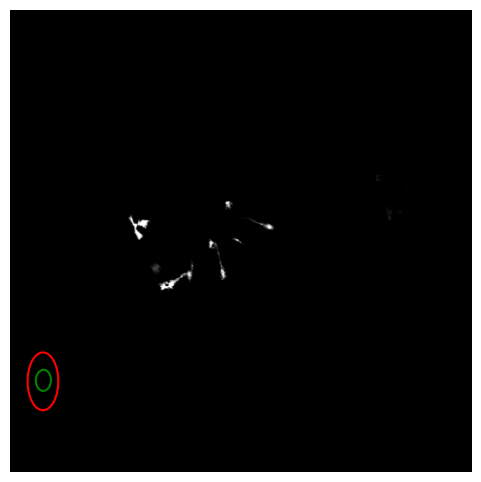

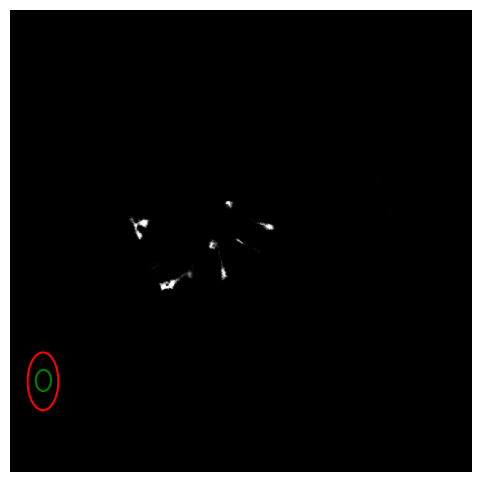

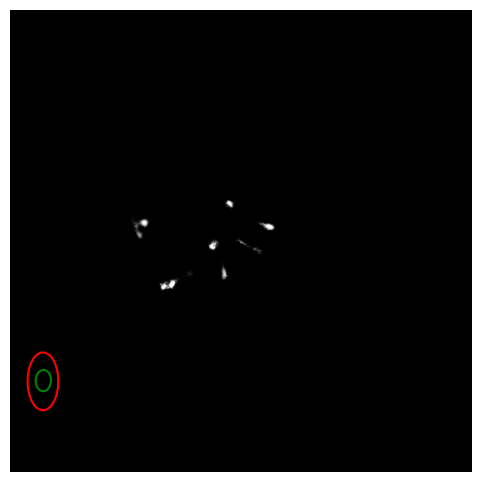

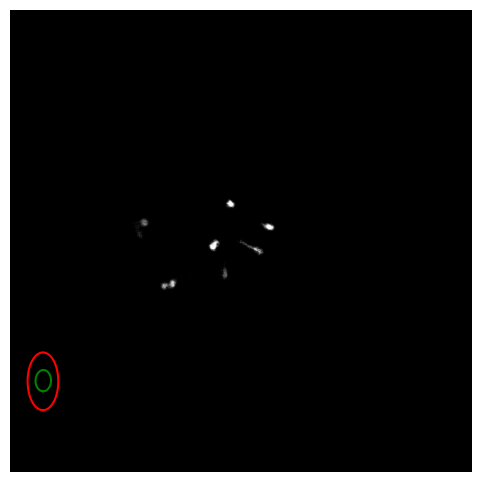

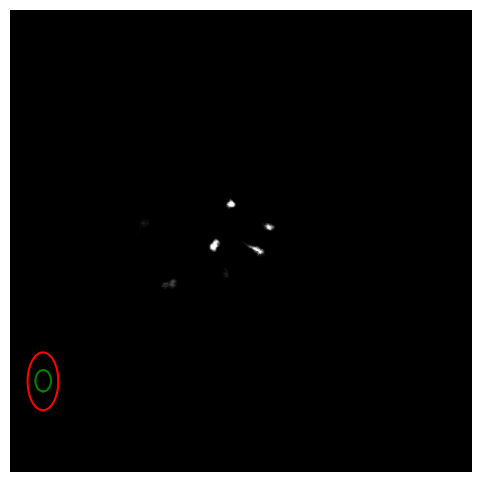

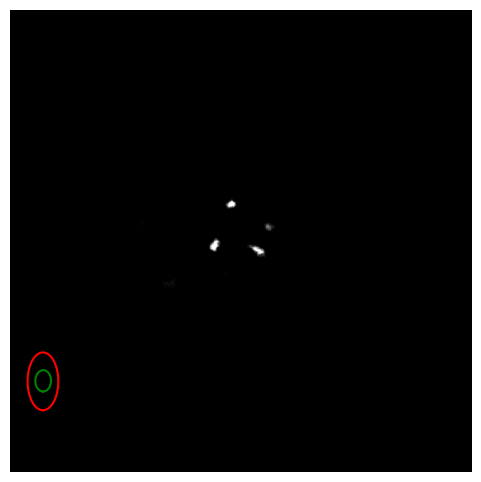

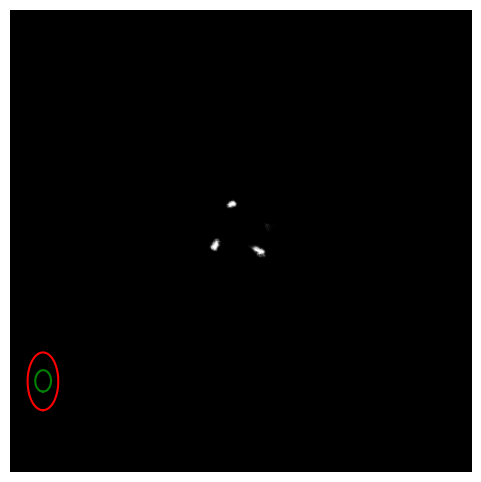

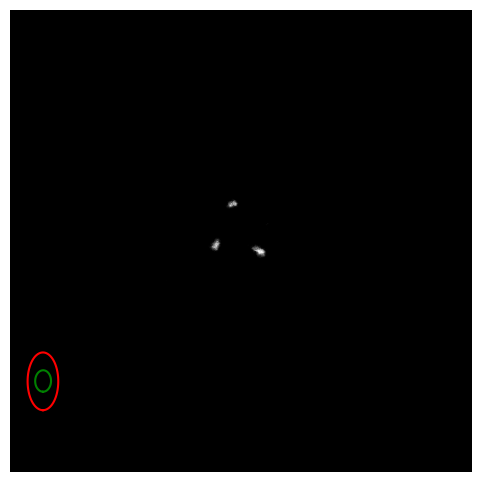

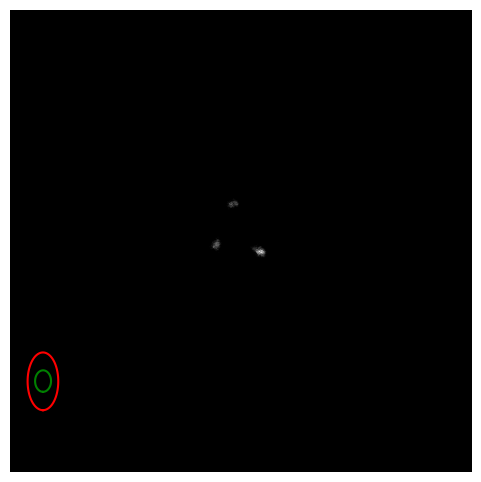

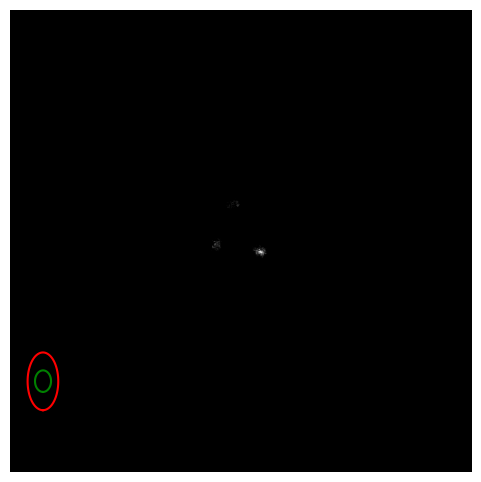

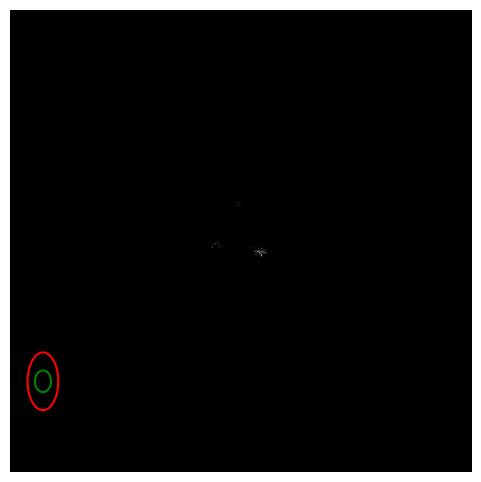

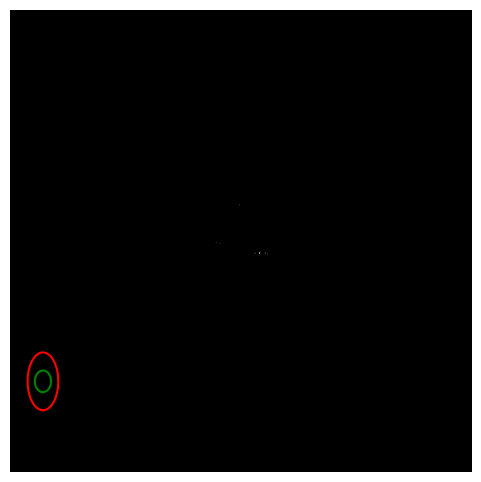

In [39]:
for z in range(OP1_cropped.shape[0]):
    # Display result
    plt.figure(figsize=(6, 6))
    plt.imshow(OP1_cropped[z], cmap="gray")
    plt.plot(OP1_v_init[:, 0], OP1_v_init[:, 1], "r-")
    plt.plot(v_final[z][:, 0], v_final[z][:, 1], "g-")
    plt.axis("off")
    plt.show()

In [14]:
smoothed_OP1 = OP1_snake.get_I()
edge_map_OP1 = OP1_snake.get_edge_map()
fx_OP1, fy_OP1 = OP1_snake.get_fext_components()

print(smoothed_OP1.shape, edge_map_OP1.shape, fx_OP1.shape, fy_OP1.shape)
print(smoothed_OP1.dtype, edge_map_OP1.dtype, fx_OP1.dtype, fy_OP1.dtype)

(60, 512, 512) (60, 512, 512) (60, 512, 512) (60, 512, 512)
uint8 uint8 uint8 uint8


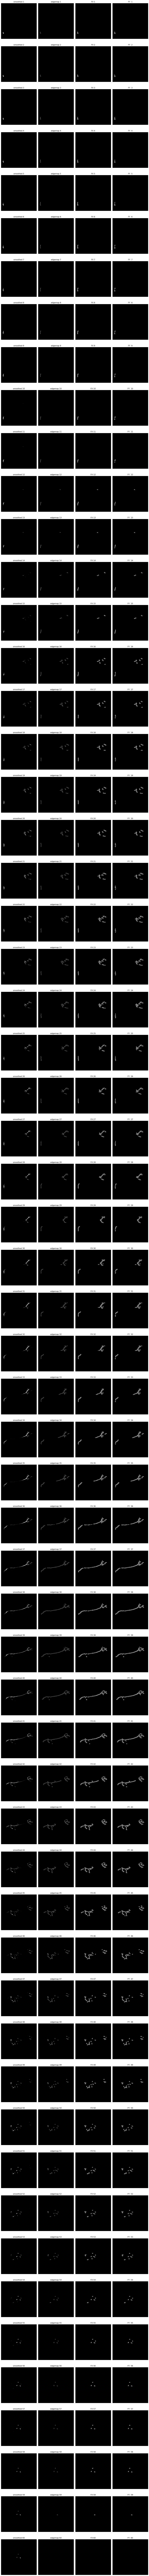

In [15]:
num_imgs = len(OP1_cropped)
cols = 4  # 4 imagens por linha
rows = num_imgs  # cada conjunto ocupa uma linha

fig, axarr = plt.subplots(rows, cols, figsize=(14, 4 * rows))

for i, img in enumerate(OP1_cropped):
    axarr[i, 0].imshow(smoothed_OP1[i], cmap="gray")
    axarr[i, 0].set_title(f"smoothed {i+1}")
    axarr[i, 0].axis("off")

    axarr[i, 1].imshow(edge_map_OP1[i], cmap="gray")
    axarr[i, 1].set_title(f"edgemap {i+1}")
    axarr[i, 1].axis("off")

    axarr[i, 2].imshow(fx_OP1[i], cmap="gray")
    axarr[i, 2].set_title(f"FX {i+1}")
    axarr[i, 2].axis("off")

    axarr[i, 3].imshow(fy_OP1[i], cmap="gray")
    axarr[i, 3].set_title(f"FY  {i+1}")
    axarr[i, 3].axis("off")
plt.tight_layout()
plt.show()